In [1]:
# Experiment 6 - To analyze frequency contents of an image and to observe the effect of lowpass and highpass filter on the image

In [2]:
from skimage import io
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gray Image')

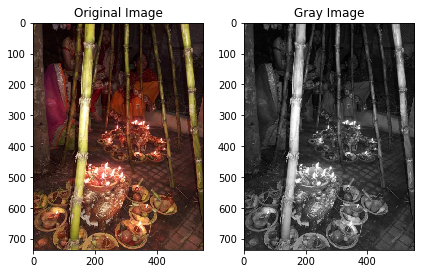

In [13]:
image_ori = io.imread('home.jpeg')
image=rgb2gray(image_ori)
image_gray = image.copy()

plt.figure()
plt.subplot(1,2,1)
io.imshow(image_ori)
plt.title('Original Image')


plt.subplot(1,2,2)
io.imshow(image)
plt.title('Gray Image')

Text(0.5, 1.0, 'Phase of FFT of Original Image')

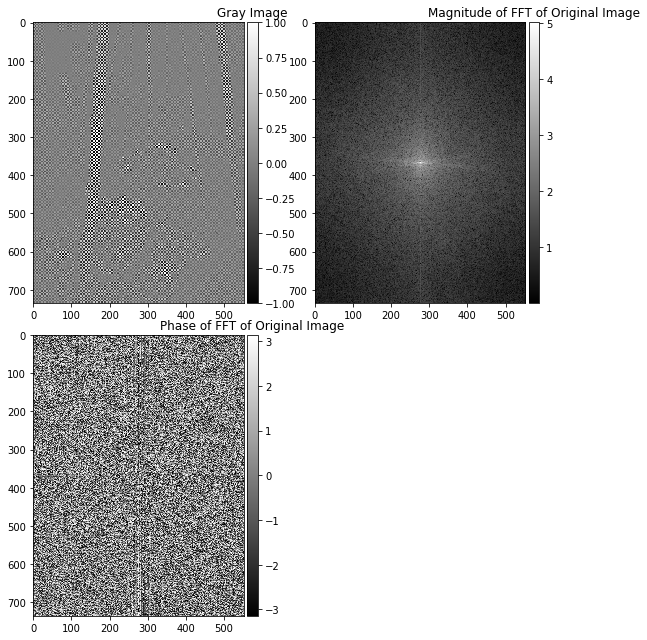

In [14]:
sh=image.shape
row=sh[0]
col=sh[1]
for r in range(0,row):
    for c in range(0,col):
        image[r][c]=((-1)**(r+c))*image[r][c]

im_fft=np.fft.fft2(image)
sh=im_fft.shape
#im_fft_abs[0:4,0:4]

im_fft_abs=np.abs(im_fft)
im_abs_log=np.log10(1+im_fft_abs)
#im_fft_abs[0:4,0:4]

im_fft_phase=np.angle(im_fft)#angle is in radians
#im_fft_phase[0:4,0:4]

plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
io.imshow(image,cmap='gray')
plt.title('Gray Image')

plt.subplot(2,2,2)
io.imshow(im_abs_log,cmap='gray')
plt.title('Magnitude of FFT of Original Image')

plt.subplot(2,2,3)
io.imshow(im_fft_phase,cmap='gray')
plt.title('Phase of FFT of Original Image')

Text(0.5, 1.0, 'Post Processed Image')

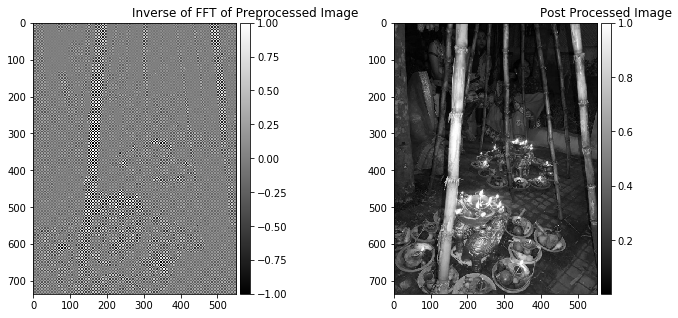

In [15]:
# Inverse FFT to get the original image
im_inv=np.fft.ifft2(im_fft)
im_inv=np.real(im_inv)
im_post=im_inv.copy()

for r in range(0,row):
    for c in range(0,col):
        im_post[r][c]=((-1)**(r+c))*im_inv[r][c]

plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
io.imshow(im_inv,cmap='gray')
plt.title('Inverse of FFT of Preprocessed Image')

plt.subplot(1,2,2)
io.imshow(im_post,cmap='gray')
plt.title('Post Processed Image')

Conclusion:-

If we take the inverse of an image by considering only magnitude or phase then we do not get the original image.

Logarithm of fft value is taken to reduce the dynamic range.

For better visual impression for magnitude of the fft we multiply alternate value by one

After taking inverse of centered fft we require post processing to reverse the effect of pre-processing

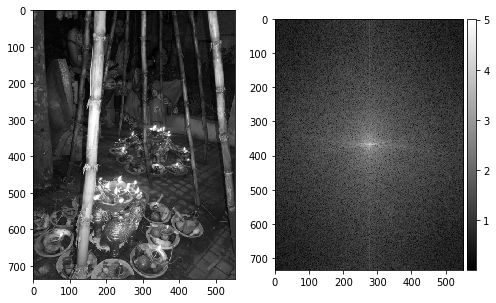

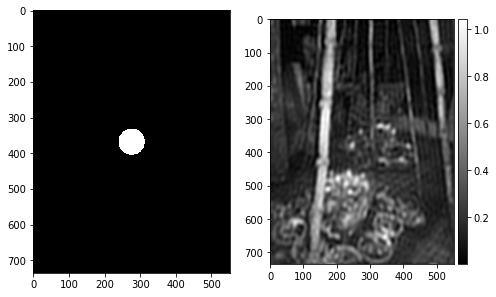

In [21]:
# Construct LPF in fft domain

low_pass = image.copy()
centrow = int(sh[0]/2)
centcol = int(sh[1]/2)

# cut off frequency of lowpass filter, 5
cutoff_freq = sh[0]/20

for r in range(0,row):
    for c in range (0,col):
        dist = np.sqrt(((r-centrow)**2)+((c-centcol)**2))
        if dist>cutoff_freq:
            low_pass[r][c]=0
        else:
            low_pass[r][c]=1
            
# filter the image
image_filtered = im_fft*low_pass

# reconstruct image
image_sp = np.fft.ifft2(image_filtered)
image_sp = np.abs(image_sp)

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
io.imshow(image_gray, cmap='gray')

plt.subplot(1,2,2)
im_log=np.log10(1+np.abs(im_fft))
io.imshow(im_log, cmap='gray')

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
io.imshow(low_pass, cmap='gray')

plt.subplot(1,2,2)
io.imshow(image_sp, cmap='gray')

Conclusion - 

The given image is filtered using low pass filter with different cut off frequencies.It is observed that blurring of the image increases with the increase in cutoff frequency.

The same image is filtered using high pass filter, it is seen that filtered image shows edges in the image this is because edges high pass filter passes high frequency components which are because of edges of the image.